dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])
['MPG', 'cylinders', 'cubicInches', 'horsepower', 'weightLbs', 'time-to-sixty', 'year']
{'cylinders': ['3', '4', '5', '6', '8']}
[1.400e+01 4.000e+00 3.500e+02 1.650e+02 4.209e+03 1.200e+01 1.972e+03]


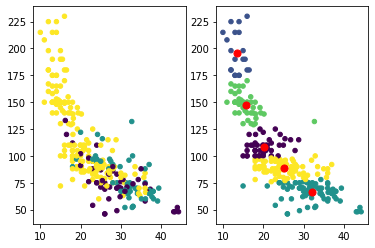

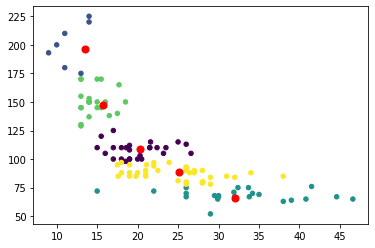

In [1]:
# Zadanie 1
# Poniżej przy pomocy funkcji fetch_openml można zaimportować zbiór danych o samochodach
# Zapoznaj się ze zbiorem danych (zwizualizuj wybrane przez siebie cechy) a następnie podziel go na zbiór uczący i testowy
# Wytrenuj klasyfikator KMeans z zadaną przez siebie liczbą klas i zwizualizuj wyniki predykcji na zbiorze testowym

from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

samochody = fetch_openml('cars1')

print(samochody.keys())
print(samochody['feature_names'])
print(samochody['categories'])
print(samochody['data'][0])

# Podzielenie zbioru na cechy oraz etykiety
# Wybór cechy pierwszej - MPG, czyli ilość mil, które można przejechac na jednym galonie paliwa
# Wybór cechy czwartej - horsepower, czyli moc silnika w koniach mechanicznych
X = samochody.data[:, [0, 3]]
y = samochody['target']
y = [int(elem) for elem in y]

# Użycie funkcji do podzielenia zbioru na zbiór uczący i zbiór testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Tworzenie klasyfikatora z pięcioma klastrami (klasami)
kmn = KMeans(n_clusters=5)

# Uczenie klasyfikatora na danych treningowych
kmn.fit(X_train)

# Wyciągnięcie punktów centralnych klastrów - widoczne będą na wykresie obok punktów ze zbioru uczącego
centra = kmn.cluster_centers_

fig, ax = plt.subplots(1, 2)
# Pierwszy wykres to zbiór uczący, z prawdziwymi klasami
ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20)

# Użycie danych treningowych żeby sprawdzić co klasyfikator o nich myśli
y_pred_train = kmn.predict(X_train)
ax[1].scatter(X_train[:, 0], X_train[:, 1], c=y_pred_train, s=20)

# Dołożenie na drugim wykresie centra klastrów
ax[1].scatter(centra[:, 0], centra[:, 1], c='red', s=50)
plt.show()

# Próba przewidzenia klasy samochodów dla zbioru testowego
y_pred = kmn.predict(X_test)

# Nowe klasy samochodów przewidziane przez klastrowanie
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, s=20)

# Wyświetlenie centra klastrów
plt.scatter(centra[:, 0], centra[:, 1], c='red', s=50)
plt.show()
# Zadanie 2
# Opisz własnymi słowami, jakie klasy samochodów wg Ciebie znalazły się w zbiorze

# W poszczególnych klastrach występują samochody o różnych kombinacjach spalanie/moc silnika
# W najniższym klastrze są samochody o dużym zasięgu i niskiej mocy - auta miejskie
# W najwyższym klastrze znajdują się samochody sportowe - dość spora moc silnika i niezbyt duży zasięg zasięg.